# HW4

### 9.13
模拟 $\phi=0.7$，$\theta=−0.5$，$\mu=100$ 的 ARMA(1, 1) 模型。模拟 50 个值，但将最后的 10 个值搁置起来，以对预测值与真实值进行比较。

In [75]:
set.seed(114514)
series = arima.sim(n=50, model=list(ar=0.7, ma=0.5)) + 100 

real = series[41:50]
series = series[1:40]

#### (a)
使用序列前 40 个值，求 $\phi$、$\theta$ 和 $\mu$ 的极大似然估计值。  

$\text{Solution.}$

In [76]:
model = arima(series, order=c(1,0,1), method='ML')
model


Call:
arima(x = series, order = c(1, 0, 1), method = "ML")

Coefficients:
         ar1     ma1  intercept
      0.6524  0.9015   100.1296
s.e.  0.1202  0.1466     0.7776

sigma^2 estimated as 0.9029:  log likelihood = -56.29,  aic = 120.58

由上可知，$\hat{\phi} = \boxed{0.6524}$ , $\hat{\theta} = \boxed{0.9015}$ , $\hat{\mu} = \boxed{100.1296}$。 

除了 $\hat{\theta}$ 之外，其他估计值与真实值相差不大。

#### (b)
使用所估计的模型，预测序列接下来的 10 个值，并画出带 10 个预测值的序列。在估计的序列均值上画一条水平线。  

$\text{Solution.}$

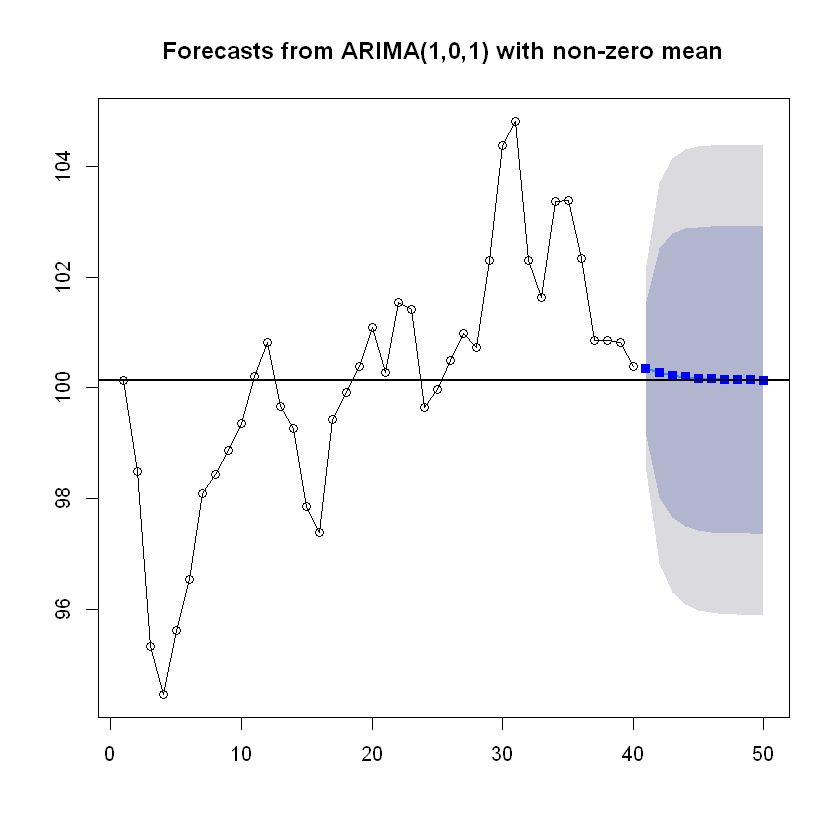

In [77]:
library(forecast)
forecast_values = forecast(model, h=10)
plot(forecast_values, type='o')
points(forecast_values$mean, col='blue',pch=15)
abline(h=100.1296, col='black', lwd=2)

#### (c)
将 10 个预测值与所留出的真实值进行比较。  

$\text{Solution.}$

In [78]:
pred = forecast_values$mean

cbind(real, pred)

,real,pred
41,99.59074,100.3477
42,98.08429,100.2719
43,98.12495,100.2224
44,97.55493,100.1902
45,97.97085,100.1691
46,97.77657,100.1554
47,99.95185,100.1464
48,102.23360,100.1406
49,100.36248,100.1368
50,100.45562,100.1343


差别都还可以，不算太大。

#### (d)
画出预测及其 95% 预测极限。真实值是否落入预测极限的区间？  

$\text{Solution.}$

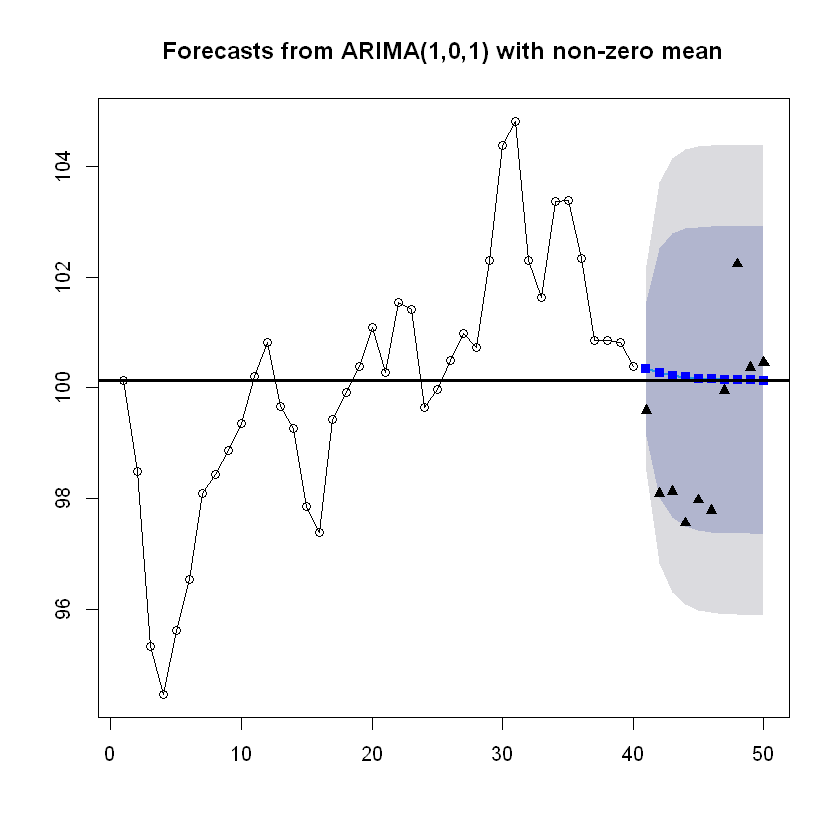

In [79]:
plot(forecast_values, type='o')
points(forecast_values$mean, col='blue',pch=15)
points(x=(41:50), y=real, col= 'black',pch=17)
abline(h=100.1296, col='black', lwd=3)

真实值基本都在预测区间当中。

#### (e)
用同样的参数值和相同的样本容量，模拟一个新的序列，并重复 (a) 到 (d)。  

$\text{Solution.}$


Call:
arima(x = series, order = c(1, 0, 1), method = "ML")

Coefficients:
         ar1     ma1  intercept
      0.5480  0.2777    99.5971
s.e.  0.1961  0.2350     0.3782

sigma^2 estimated as 0.7639:  log likelihood = -51.73,  aic = 111.46


,real,pred
41,101.02436,101.09532
42,100.35559,100.41818
43,101.67953,100.04708
44,100.26480,99.84371
45,99.24863,99.73225
46,99.05965,99.67117
47,100.23960,99.63769
48,99.12448,99.61935
49,98.85758,99.60929
50,99.70334,99.60378


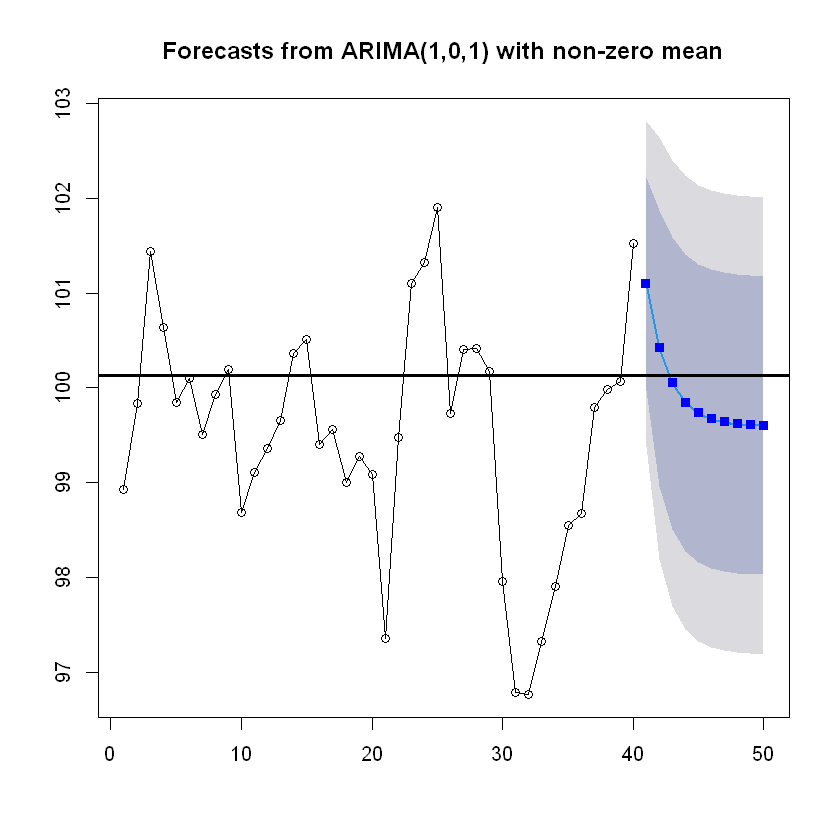

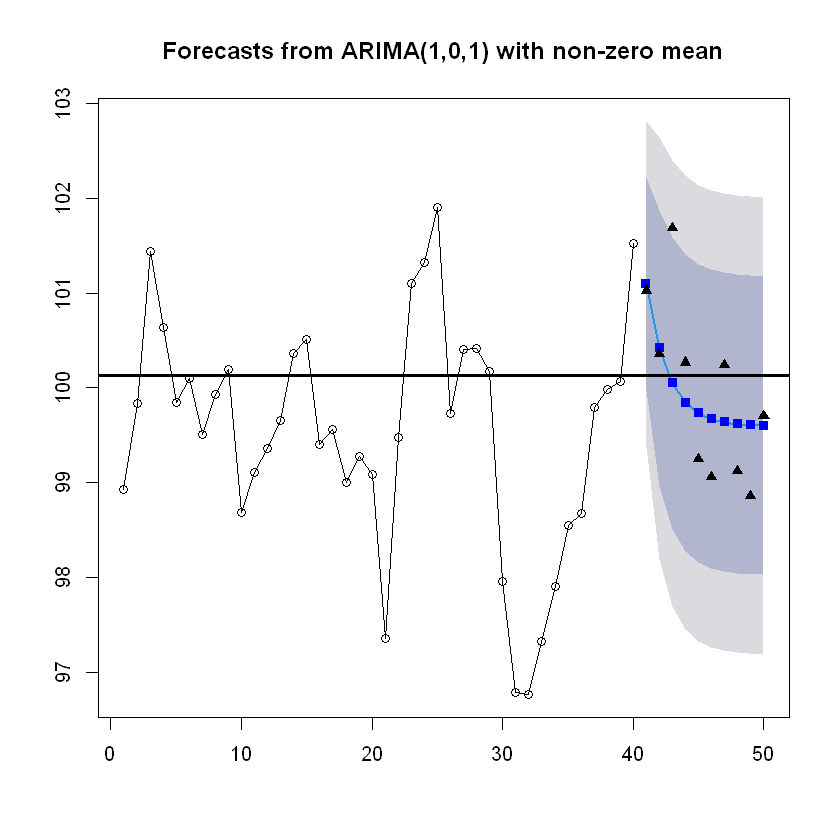

In [80]:
set.seed(10086)
series = arima.sim(n=50, model=list(ar=0.7, ma=0.5)) + 100
real = series[41:50]
series = series[1:40]
model = arima(series, order=c(1,0,1), method='ML')
print(model)

forecast_values = forecast(model, h=10)

plot(forecast_values, type='o')
points(forecast_values$mean, col='blue',pch=15)
abline(h=100.1296, col='black', lwd=3)
pred = forecast_values$mean

cbind(real, pred)

plot(forecast_values, type='o')
points(forecast_values$mean, col='blue',pch=15)
points(x=(41:50), y=real, col= 'black',pch=17)
abline(h=100.1296, col='black', lwd=3)


模拟效果基本与第一次相同。效果都很好。

***

### 9.14
模拟 $\theta=0.8$，$\theta_0=0$ 的 IMA(1, 1) 模型。模拟 35 个值，但将最后的 5 个值搁置起来，以对预测值与真实值进行比较。


In [81]:
set.seed(1919810) 
series = arima.sim(n=35, model=list(order=c(0,1,1), ma=-0.8))[-1]
# 去掉第一个值，因为第一个值是常数0
real= series[31:35]
series = series[1:30]

#### (a)
使用序列前 30 个值，求 $\theta$ 的极大似然估计值。  

$\text{Solution.}$

In [82]:
model = arima(series, order=c(0,1,1), method='ML')
model


Call:
arima(x = series, order = c(0, 1, 1), method = "ML")

Coefficients:
         ma1
      -0.743
s.e.   0.097

sigma^2 estimated as 0.8141:  log likelihood = -38.57,  aic = 81.14

由上可知，$\hat{\theta} = \boxed{0.7430}$ 。

#### (b)
使用所估计的模型，预测序列接下来的 5 个值，并画出带 5 个预测值的序列。这些预测值有什么特殊之处吗？  

$\text{Solution.}$

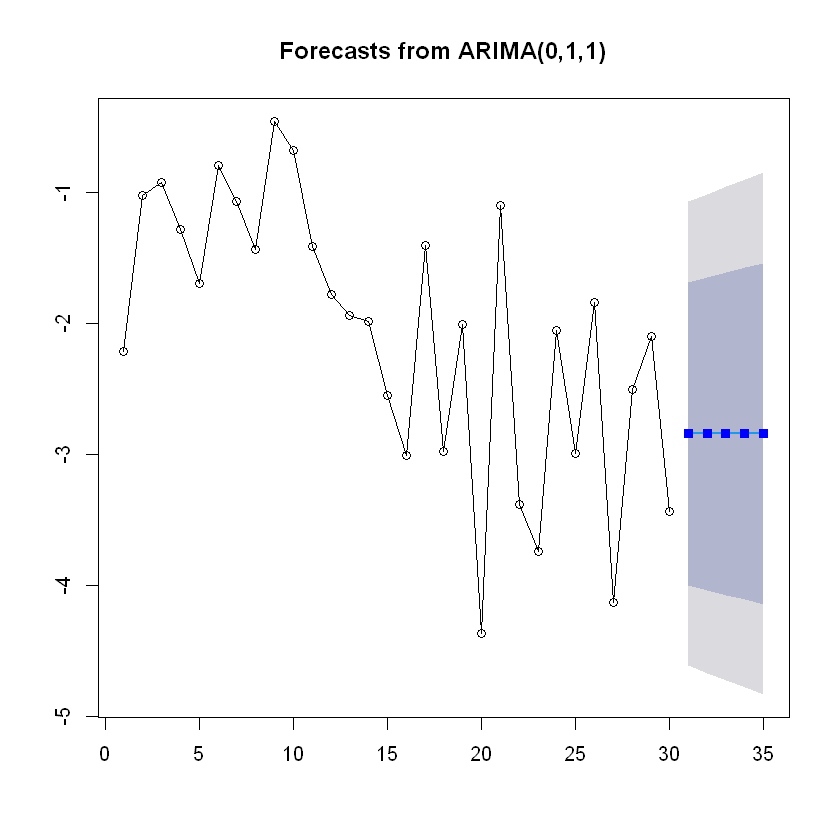

In [83]:
library(forecast)
forecast_values = forecast(model, h=5)
plot(forecast_values, type='o')
points(forecast_values$mean, col='blue',pch=15)


特殊之处在于，这五个预测值似乎并没有什么波动，都保持在水平线之上。

#### (c)
将 5 个预测值与所留出的真实值进行比较。  

$\text{Solution.}$

In [84]:
pred= forecast_values$mean
cbind(real, pred)

,real,pred
31,-0.8370999,-2.841928
32,-2.4948004,-2.841928
33,-2.9323672,-2.841928
34,-2.8074105,-2.841928
35,-2.5760650,-2.841928


比较可知，模拟效果尚可，偏误不大。

#### (d)
画出预测及其 95% 预测极限。真实值是否落入预测极限的区间？  

$\text{Solution.}$

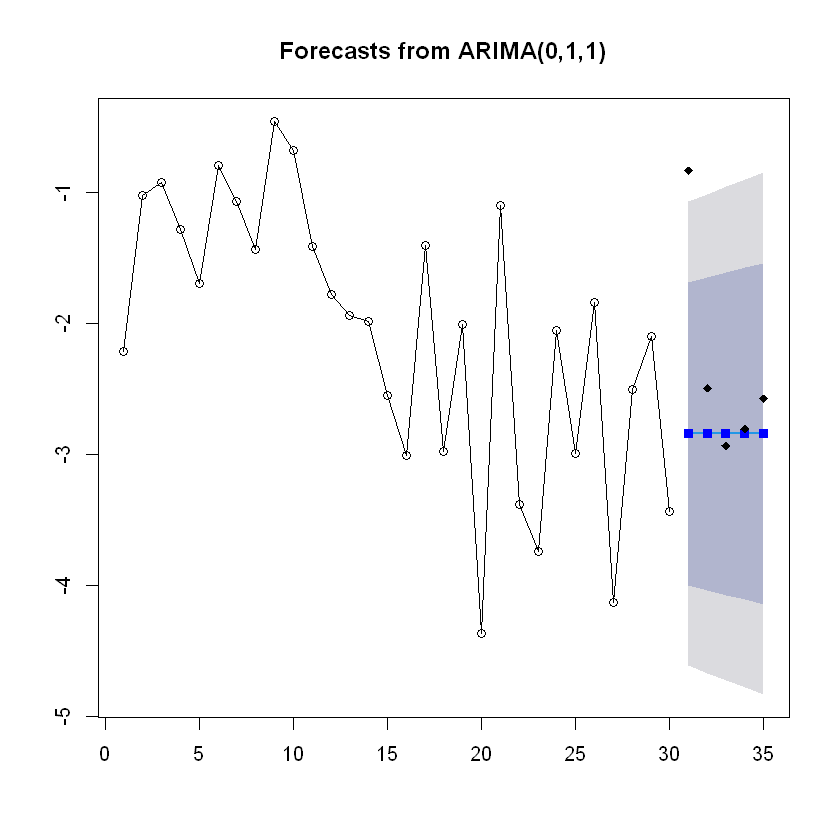

In [85]:
forecast_values = forecast(model, h=5)
plot(forecast_values, type='o')
points(forecast_values$mean, col='blue',pch=15)
points(x=(31:35), y= real, col= 'black',pch=18)

第31个真实值明显偏离了预测区间，但其他真实值都在预测区间内。  

甚至第34个真实值点基本和预测值重合了。

#### (e)
用同样的参数值和相同的样本容量，模拟一个新的序列，并重复 (a) 到 (d)。  

$\text{Solution.}$


Call:
arima(x = series, order = c(0, 1, 1), method = "ML")

Coefficients:
          ma1
      -1.0000
s.e.   0.1045

sigma^2 estimated as 0.5678:  log likelihood = -34.64,  aic = 73.28


,real,pred
31,0.07555234,0.05628263
32,0.91543928,0.05628263
33,0.25717217,0.05628263
34,0.40096227,0.05628263
35,-0.27907410,0.05628263


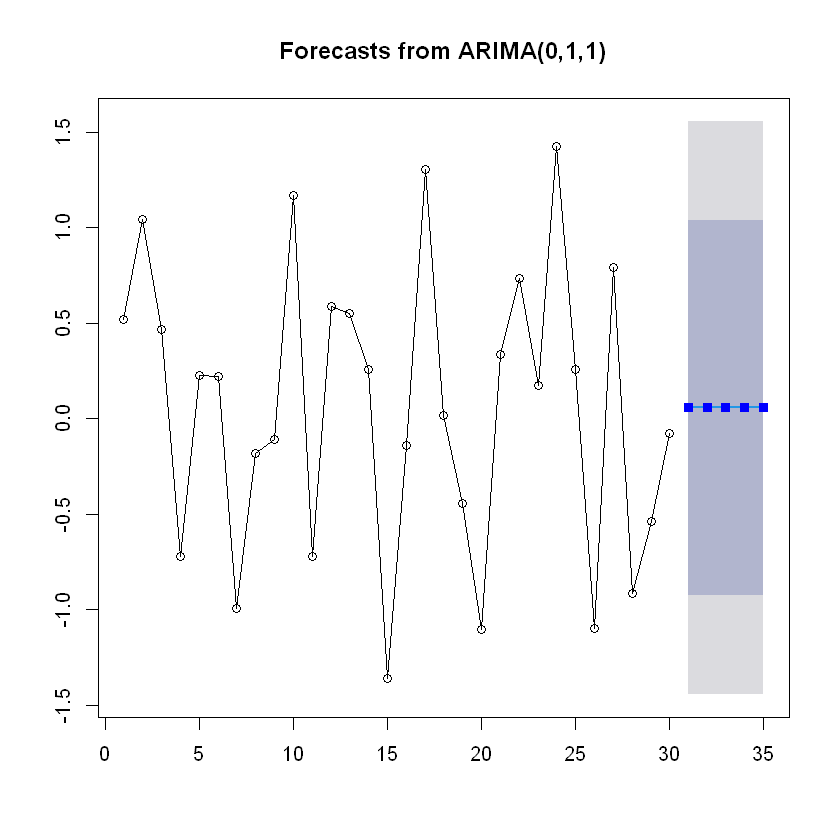

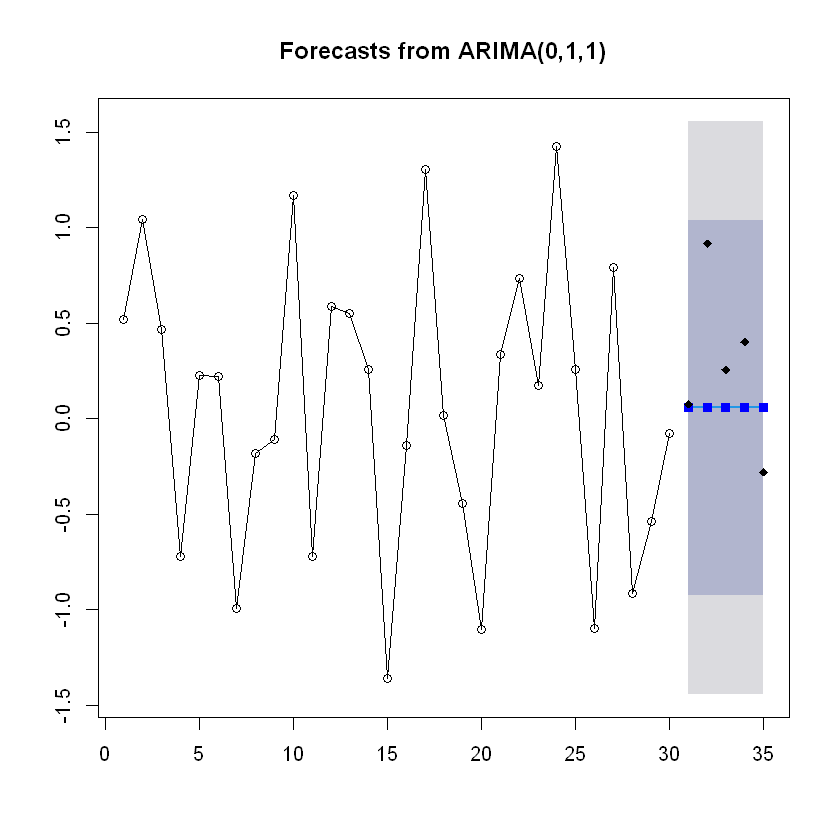

In [86]:
set.seed(7777777) 
series = arima.sim(n=35, model=list(order=c(0,1,1), ma=-0.8))[-1]
real= series[31:35]
series = series[1:30]
model = arima(series, order=c(0,1,1), method='ML')
print(model)

forecast_values = forecast(model, h=5)
plot(forecast_values, type='o')
points(forecast_values$mean, col='blue',pch=15)
pred= forecast_values$mean
cbind(real, pred)

plot(forecast_values, type='o')
points(forecast_values$mean, col='blue',pch=15)
points(x=(31:35), y= real, col= 'black',pch=18)

这一次，模拟效果很好，没有再出现真实值点明显偏离了预测区间的情况。